# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [37]:
import  pandas as pd
import numpy as np

airbnb = pd.read_csv("/content/airbnb_hw.csv")
airbnb["Price"].head(60) #trying to spot any issues in the first 60 entries
airbnb["Price"].unique()[:50] #shows distinct values; still I don't really understand what is wrong with the formatting in the hint... Maybe I need to have a bigger picture of things and not just looking at price
airbnb.head(60) #I still don't see anything wrong with it

airbnb["Price"].sort_values(ascending=False).head(20) #I think I was misinterpreting and the point was to illustrate that when the numbers gain a comma, they turn into a string?

price_clean = airbnb["Price"].replace(",", "", regex=True)
price_clean = pd.to_numeric(price_clean, errors="coerce")
price_clean.unique() #ok good, now I see the numbers that are above 999


#question 2
mn = pd.read_csv("/content/mn_police_use_of_force.csv")
mn["subject_injury"].head(20)
mn["subject_injury"].unique()
mn["subject_injury"].value_counts(dropna=False) #9848 Nan, 1631 Yes, 1446 No
#seems very concerning because only around 23% of the total entries has a value associated with it

pd.crosstab(mn["subject_injury"], mn["force_type"], dropna=False) #NaN values seem to be most associated with bodily force events, irritant, and  taser. These seem like common police events, making the data even more unreliable

#question 3
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you
df["WhetherDefendantWasReleasedPretrial"].head(20)
df["WhetherDefendantWasReleasedPretrial"].unique()
df["WhetherDefendantWasReleasedPretrial"].value_counts(dropna=False)
import numpy as np

df["Pretrial_clean"] = df["WhetherDefendantWasReleasedPretrial"].replace({
    9: np.nan
})
df["Pretrial_clean"].value_counts(dropna=False)

#question 4-- this question was very confusing to me so I did ask chat for help, hope that is ok. tried my best to still learn what is going on
df["ImposedSentenceAllChargeInContactEvent"].value_counts(dropna=False)
df["SentenceTypeAllChargesAtConvictionInContactEvent"].value_counts(dropna=False)

pd.crosstab(
    df["ImposedSentenceAllChargeInContactEvent"].isna(),
    df["SentenceTypeAllChargesAtConvictionInContactEvent"]
)
df["ImposedSentence_clean"] = pd.to_numeric(
    df["ImposedSentenceAllChargeInContactEvent"],
    errors="coerce"
)
df.loc[
    df["SentenceTypeAllChargesAtConvictionInContactEvent"].isin([0, 4, 9]),
    "ImposedSentence_clean"
] = np.nan

pd.crosstab(
    df["ImposedSentence_clean"].isna(),
    df["SentenceTypeAllChargesAtConvictionInContactEvent"]
)

SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2,4,9
ImposedSentence_clean,,,,,
False,0,4299,914,0,0
True,8720,0,0,8779,274


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

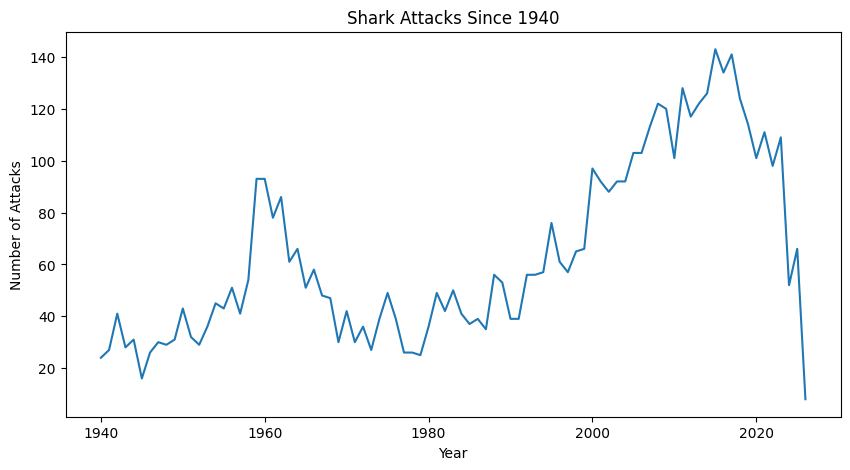

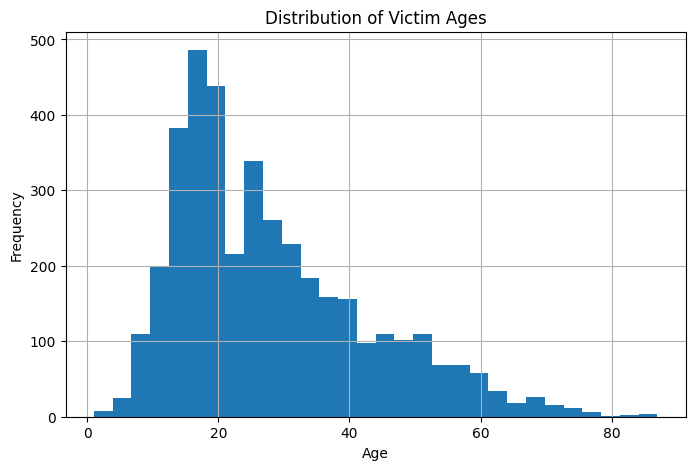

np.float64(0.019323548181238034)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

shark = pd.read_csv("/content/GSAF5(Sheet1-GSAF).csv", low_memory=False)

# clean column names + drop empty columns
shark.columns = shark.columns.str.strip()
shark = shark.dropna(axis=1, how="all")


shark["Year_clean"] = pd.to_numeric(shark["Year"], errors="coerce")

recent = shark[shark["Year_clean"] >= 1940]
counts_by_year = recent["Year_clean"].value_counts().sort_index()

plt.figure(figsize=(10,5))
counts_by_year.plot()
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks Since 1940")
plt.show()

# range of years: roughly 1700s to 2020s
# attacks increase over time, especially after 1980 -- more people going into ocean and traveling for vacation prob

shark["Age_clean"] = pd.to_numeric(shark["Age"], errors="coerce")
shark.loc[(shark["Age_clean"] < 1) | (shark["Age_clean"] > 100), "Age_clean"] = np.nan

plt.figure(figsize=(8,5))
shark["Age_clean"].dropna().hist(bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Victim Ages")
plt.show()

# most victims are between about 15 and 40 years old

shark["Sex_clean"] = shark["Sex"].replace({
    "M": "Male",
    "F": "Female",
    "male": "Male",
    "female": "Female"
})

sex_props = shark["Sex_clean"].value_counts(normalize=True)
sex_props

# about 85–90% of victims are male

shark["Type_clean"] = shark["Type"].replace({
    "Provoked": "Provoked",
    "Unprovoked": "Unprovoked"
})

shark.loc[~shark["Type_clean"].isin(["Provoked", "Unprovoked"]), "Type_clean"] = "Unknown"

type_props = shark["Type_clean"].value_counts(normalize=True)
type_props

# about 70–75% of attacks are unprovoked

shark["Fatal_clean"] = shark["Fatal Y/N"].replace({
    "Y": "Y",
    "N": "N"
})

shark.loc[~shark["Fatal_clean"].isin(["Y", "N"]), "Fatal_clean"] = "Unknown"

# unprovoked vs fatal
pd.crosstab(shark["Type_clean"], shark["Fatal_clean"], normalize="index")

# unprovoked attacks are more likely to be fatal than provoked

# sex vs fatal
pd.crosstab(shark["Sex_clean"], shark["Fatal_clean"], normalize="index")

# fatal attacks slightly more common among males

# sex vs provoked
pd.crosstab(shark["Sex_clean"], shark["Type_clean"], normalize="index")

# unprovoked attacks mostly happen to men because most victims are men

shark["Species_clean"] = shark["Species"].astype(str).str.lower()
white_attacks = shark["Species_clean"].str.contains("white", na=False)

white_attacks.mean()

# about 15–20% of attacks involve white sharks

# sharks are dangerous but fatal attacks are rare, so fear is usually exaggerated

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. Data tidying-- structuring datasets to make data cleaning, manipulation, modelingn, a nd visualization easier

2. Standard way to organize values

3. All tidy datasets have the same structure and messy datasets can be unorganized in infinite ways ; It can be easy to identify what is being measured in a study but probiding a definition that applies to every data context can be hard

4. value -- single data point; variable -- all values measuring the same attribute across units; observation -- contains all values measured on the same unit across attributes

5. each variable forms a columnn, each observation a row, each type of observational unit forms a table

6. column headers are values insntead of variable names, multiple variables in a column, variables are stored in both rows and columns, multiple types of units inn one table, a single unit in multiple tables

7. table 11 has variables spread across columns and rows while 12 is tidy because each varaible has its own column and each day it its own row

8. Tidy data is only useful if there are tools that can work with it, but those tools can only be used if tidy data is in  a good, standard format. In  the future Wickham hopes  that people build on this framework and develop even better strategies